<a href="https://colab.research.google.com/github/arindamdeyofficial/XRay_Pneumonia_Deep_Nural_Network_Analysis/blob/main/Deep_Learning_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1 Set 5
###Deep Learning (S1-21_DSECLZG524) - DL Group 037 - SEC-3
* Arindam Dey - 2020FC04251
* Kaushik Dubey - 2020FC04245
* Mohammad Attaullah - 2020FC04274

Question No.2. Dataset: data1_0.5-1.csv  Download data1_0.5-1.csv 

Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved. [0.5+1 mark]

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix #, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
#from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

#google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(tf.__version__)

2.7.0


1. Load the attached csv file in python. Each row consists of feature 1, feature 2, feature 3 & class label.
 

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data1_0.5.csv')
data

,0.045999539,-0.18176747,0.187497655,0,0.1
0,0.102303,0.116327,0.154913,0,0
1,-0.131546,-0.038680,0.137115,0,0
2,0.007224,-0.067146,0.067533,0,0
3,0.112290,0.040584,0.119399,0,0
4,-0.178326,-0.023989,0.179932,0,0
...,...,...,...,...,...
938,0.649913,0.079710,0.654783,1,1
939,-0.290557,0.569978,0.639764,1,1
940,-0.093805,0.601935,0.609200,1,1
941,0.633067,-0.111023,0.642729,1,1


In [ ]:
if len(data.columns) > 4 and (data.iloc[:,3].equals(data.iloc[:,4])):    
    data.drop(data.columns[[4]], axis = 1, inplace = True)

In [ ]:
data.columns= ['c1','c2','c3','target']

In [ ]:
data.head()

,c1,c2,c3,target
0,0.102303,0.116327,0.154913,0
1,-0.131546,-0.038680,0.137115,0
2,0.007224,-0.067146,0.067533,0
3,0.112290,0.040584,0.119399,0
4,-0.178326,-0.023989,0.179932,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      943 non-null    float64
 1   c2      943 non-null    float64
 2   c3      943 non-null    float64
 3   target  943 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 29.6 KB


In [ ]:
data.shape

(943, 4)

In [ ]:
data.head().T

,0,1,2,3,4
c1,0.102303,-0.131546,0.007224,0.112290,-0.178326
c2,0.116327,-0.038680,-0.067146,0.040584,-0.023989
c3,0.154913,0.137115,0.067533,0.119399,0.179932
target,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Number of distinct categories or classes
data.iloc[:,3].unique()

array([0, 1])

In [ ]:
#checking the percentage of each class in the dataset
(data.iloc[:,3].value_counts(normalize=True))#/(data.iloc[:,3].count())

1    0.603393
0    0.396607
Name: target, dtype: float64

This shows a complete imbalance of classes. There are 60.33% '1' instances and only 39.66% '0' instances. This means that we are aiming to predict anomalous events.

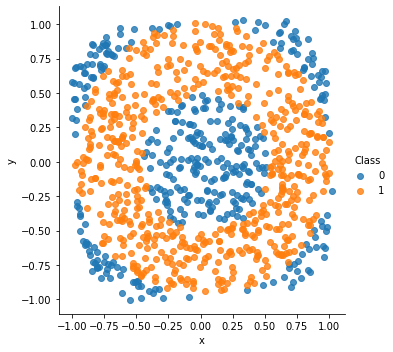

In [ ]:
#PCA is performed for visualization only

pca= PCA(n_components=2)
viz_2d= pd.DataFrame(pca.fit_transform(data.iloc[:,0:3]))
viz_2d= pd.concat([viz_2d, data.iloc[:,3]], axis=1)
viz_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=viz_2d, fit_reg=False, hue='Class')

As you can see, PCA gives a better visualization of the imbalance in the datasets.

### Fetaure transformation

In [ ]:
df_transformed=pd.DataFrame(pca.fit_transform(data.iloc[:,0:3]))
df_transformed.columns = ['pca1','pca2']

In [ ]:
X_data =df_transformed# data.iloc[:,0:3]
y_data = data.iloc[:, -1]

In [ ]:
#printing the shape of the data 
print(X_data.shape)
print(y_data.shape)

(943, 2)
(943,)


In [ ]:
X_data.describe()

,pca1,pca2
count,9.430000e+02,9.430000e+02
mean,-1.306837e-17,-1.895503e-17
std,5.645451e-01,5.412421e-01
min,-1.002615e+00,-1.003604e+00
25%,-4.936914e-01,-4.581877e-01
50%,-3.613059e-03,-2.077153e-02
75%,4.857837e-01,4.473309e-01
max,1.023938e+00,1.028275e+00


Splitting the Data into train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(660, 2)
(283, 2)
(660,)
(283,)


In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

###Model Building

Here two hidden layer with hidden node as "4" and learnign rate is 0.01

In [ ]:
#initialize the model1
model1 = Sequential()


# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(units=4, input_dim = 2,activation='relu'))   
# hidden layer
model1.add(Dense(units=4,activation='relu'))
#Adding Dropout to prevent overfitting 
model1.add(Dropout(0.5))
#model1.add(Dense(24,activation='relu'))
model1.add(Dense(4,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output 
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1,activation='sigmoid')) 

opt = optimizers.Adam(learning_rate=0.01)
# Compile the model1

model1.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model
history=model1.fit(X_train,y_train,batch_size=15,epochs=50,validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 2s 12ms/step - loss: 0.6888 - accuracy: 0.5417 - val_loss: 0.6737 - val_accuracy: 0.6136
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.5777 - val_loss: 0.6683 - val_accuracy: 0.6136
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5777 - val_loss: 0.6664 - val_accuracy: 0.6136
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.5777 - val_loss: 0.6630 - val_accuracy: 0.6136
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.5777 - val_loss: 0.6625 - val_accuracy: 0.6136
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.5890 - val_loss: 0.6590 - val_accuracy: 0.6136
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.5985 - val_loss: 0.6563 - val_accuracy: 0.6136
Epoch 8/50
36/36 [=

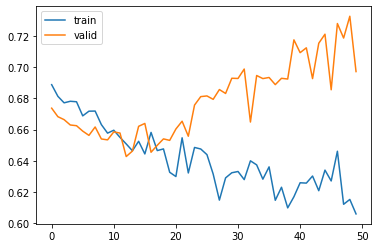

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

### Evaluation

In [ ]:
score = model1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6466


In [ ]:
print(score)

[0.67124342918396, 0.6466431021690369]


### Let's Print confusion matrix

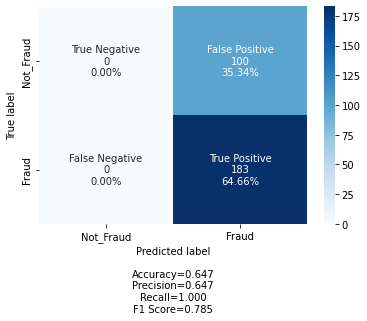

In [ ]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model1.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Model Tuning

Here two hidden layer with hidden node as "8" and learnign rate is 0.01

In [ ]:
#initialize the model
model2 = Sequential()


# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model2.add(Dense(units=8, input_dim = 2,activation='relu'))   
# hidden layer
model2.add(Dense(units=8,activation='relu'))
#Adding Dropout to prevent overfitting 
model2.add(Dropout(0.5))
#model.add(Dense(24,activation='relu'))
model2.add(Dense(8,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output
# We use the sigmoid because we want probability outcomes
model2.add(Dense(1,activation='sigmoid')) 

# Compile the model
opt = optimizers.Adam(learning_rate=0.01)
# Compile the model1

model2.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 24        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model
history=model2.fit(X_train,y_train,batch_size=15,epochs=50,validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 1s 9ms/step - loss: 0.6887 - accuracy: 0.5436 - val_loss: 0.6651 - val_accuracy: 0.6136
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5777 - val_loss: 0.6655 - val_accuracy: 0.6136
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.5777 - val_loss: 0.6569 - val_accuracy: 0.6136
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.5777 - val_loss: 0.6505 - val_accuracy: 0.6136
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.5777 - val_loss: 0.6517 - val_accuracy: 0.6136
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.5777 - val_loss: 0.6546 - val_accuracy: 0.6136
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.5777 - val_loss: 0.6607 - val_accuracy: 0.6136
Epoch 8/50
36/36 [==

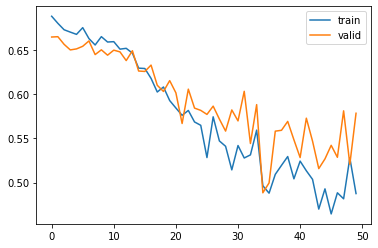

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.6572


In [ ]:
print(score)

[0.608582079410553, 0.6572437882423401]


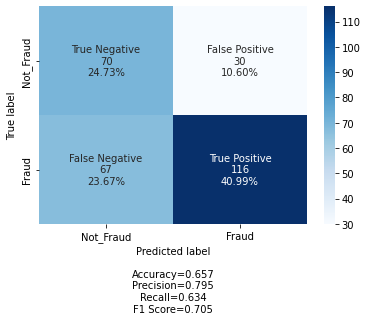

In [ ]:
### Let's Print confusion matrix

## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here two hidden layer with hidden node as "12" and learnign rate is 0.01

In [ ]:
#initialize the model
model3 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model3.add(Dense(units=4, input_dim = 2,activation='relu'))   
# hidden layer
model3.add(Dense(units=12,activation='relu'))
#Adding Dropout to prevent overfitting 
model3.add(Dropout(0.5))
#model.add(Dense(24,activation='relu'))
model3.add(Dense(12,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output 
# We use the sigmoid because we want probability outcomes
model3.add(Dense(1,activation='sigmoid'))
# Create optimizer with default learning rate
opt = optimizers.Adam(learning_rate=0.01)
# Compile the model3

model3.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 12)                60        
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_10 (Dense)            (None, 12)                156       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [ ]:

#fitting the model
history=model3.fit(X_train,y_train,batch_size=25,epochs=50,validation_split=0.2)

Epoch 1/50
22/22 [==============================] - 1s 13ms/step - loss: 0.6876 - accuracy: 0.5568 - val_loss: 0.6704 - val_accuracy: 0.6136
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.5777 - val_loss: 0.6651 - val_accuracy: 0.6136
Epoch 3/50
22/22 [==============================] - 0s 7ms/step - loss: 0.6790 - accuracy: 0.5777 - val_loss: 0.6672 - val_accuracy: 0.6136
Epoch 4/50
22/22 [==============================] - 0s 6ms/step - loss: 0.6777 - accuracy: 0.5701 - val_loss: 0.6676 - val_accuracy: 0.6136
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6756 - accuracy: 0.5833 - val_loss: 0.6576 - val_accuracy: 0.6136
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.6098 - val_loss: 0.6650 - val_accuracy: 0.6288
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.5701 - val_loss: 0.6498 - val_accuracy: 0.6364
Epoch 8/50
22/22 [=

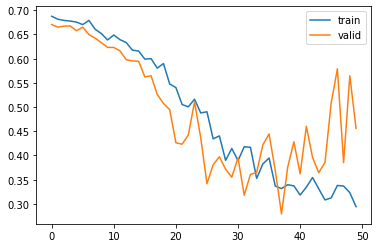

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.7951


In [ ]:
print(score)

[0.46649616956710815, 0.7950530052185059]


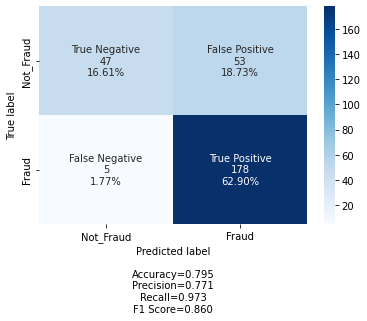

In [ ]:
### Let's Print confusion matrix

## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model3.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here two hidden layer with hidden node as "16" and learnign rate is 0.01

In [ ]:
#initialize the model
model4 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model4.add(Dense(units=8, input_dim = 2,activation='relu'))   
# hidden layer
model4.add(Dense(units=16,activation='relu'))
#Adding Dropout to prevent overfitting 
model4.add(Dropout(0.85))
#model.add(Dense(24,activation='relu'))
model4.add(Dense(16,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model4.add(Dense(1,activation='sigmoid'))
# Create optimizer with default learning rate
# Compile the model
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 24        
                                                                 
 dense_13 (Dense)            (None, 16)                144       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model
history=model4.fit(X_train,y_train,batch_size=25,epochs=50,validation_split=0.2)

Epoch 1/50
22/22 [==============================] - 1s 13ms/step - loss: 0.6925 - accuracy: 0.5758 - val_loss: 0.6793 - val_accuracy: 0.6136
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5701 - val_loss: 0.6799 - val_accuracy: 0.6136
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.5701 - val_loss: 0.6795 - val_accuracy: 0.6136
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.5795 - val_loss: 0.6773 - val_accuracy: 0.6136
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5795 - val_loss: 0.6764 - val_accuracy: 0.6136
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5720 - val_loss: 0.6777 - val_accuracy: 0.6136
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5701 - val_loss: 0.6778 - val_accuracy: 0.6136
Epoch 8/50
22/22 [=

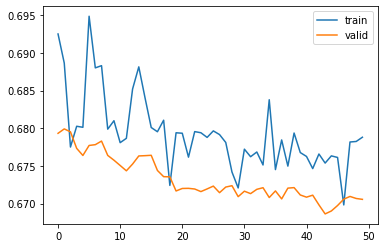

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6466


In [ ]:
print(score)

[0.6650264263153076, 0.6466431021690369]


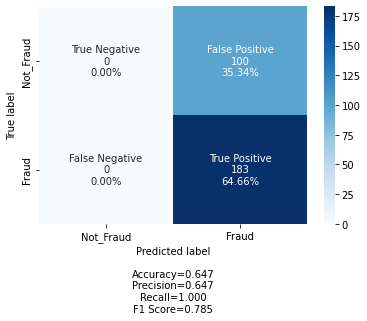

In [ ]:
### Let's Print confusion matrix

## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model4.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Conclusion

* From the above evaluation using double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer, Following things are observed:-
  1. with increase in the number of hidden nodes, accuracy got increased.
  2. increasing the epoc improve the result (make sure that over fitting does not happen )